<a href="https://colab.research.google.com/github/2303a51027/AIML-2025/blob/main/Lab05_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Import packages and dataset

In [ ]:
#import nbconvert #recode the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
d=df.describe(percentiles=[.5,.75,.9])
d

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
90%,3.000000,1.000000,50.000000,1.000000,2.000000,78.050820,297.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [ ]:
#Defing the columns
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

Exploratory analysis and plots

##Plot a bar diagram to check the number of numeric entries
from the bar diagram

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

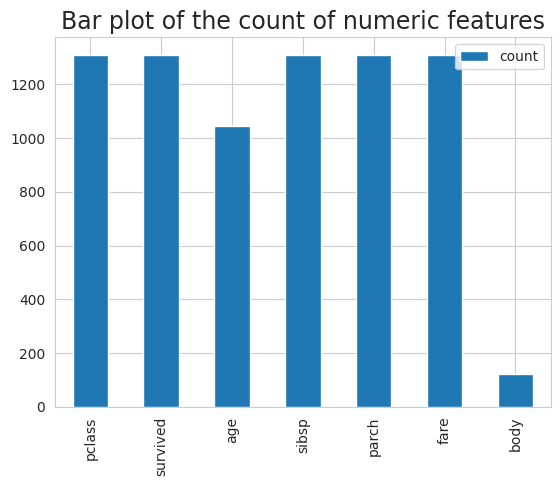

In [ ]:
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

**Check the realtive size of survived and not-survied**

<ipython-input-46-cfdef0745134>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived',data=df,palette='RdBu_r')


<Axes: xlabel='survived', ylabel='count'>

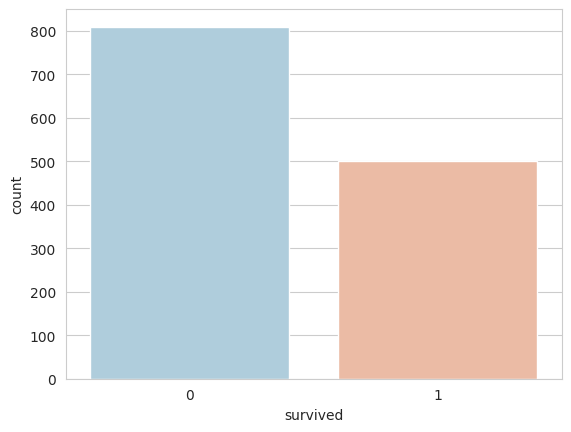

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=df,palette='RdBu_r')

#sns.pairplot(train)

**Is there a pattern for the survivability based on sex?**

it looks like more female survived than males!

---



<Axes: xlabel='survived', ylabel='count'>

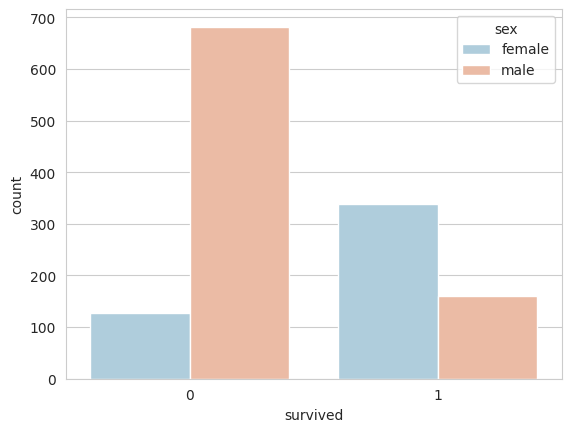

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=df,palette='RdBu_r')

**What about any pattern related to passenger class**

It looks like dispropor

<Axes: xlabel='survived', ylabel='count'>

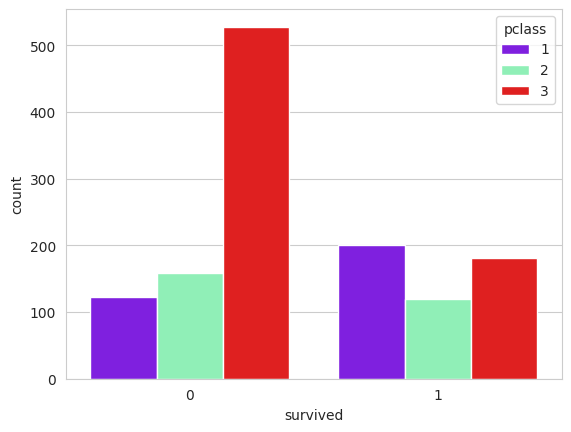

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='survived', hue='pclass',data=df,palette='rainbow')

**Following code extracts and plots the fraction of
passengers count that that survived by each class**

<ipython-input-49-17326deb9faf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived',data=f_class_survived,palette='rainbow')


Text(0.5, 1.0, 'Fraction of passsengers survied by class')

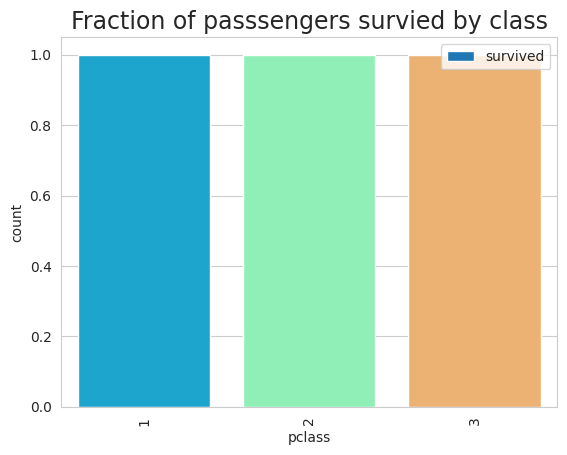

In [ ]:
f_class_survived=df.groupby('pclass')['survived'].mean()
f_class_survived=pd.DataFrame(f_class_survived)
f_class_survived
f_class_survived.plot.bar(y='survived')
sns.countplot(x='survived',data=f_class_survived,palette='rainbow')
plt.title("Fraction of passsengers survied by class",fontsize=17)

Text(0.5, 0, 'paasengers class')

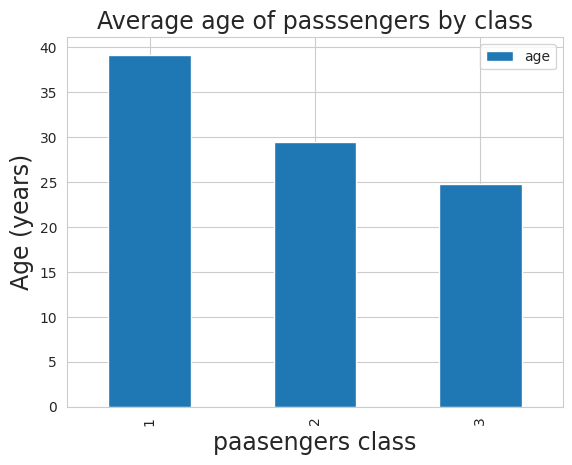

In [ ]:
f_class_Age=df.groupby('pclass')['age'].mean()
f_class_Age=pd.DataFrame(f_class_Age)

f_class_Age.plot.bar(y='age')
plt.title("Average age of passsengers by class",fontsize=17)
plt.ylabel("Age (years)",fontsize=17)
plt.xlabel("paasengers class",fontsize=17)

**Data Wrangling**

##Define a function to impute(fill-up missing values) age Feature

In [ ]:
a=list(f_class_Age['age'])
def impute_age(cols):
  age=cols[0]
  pclass=cols[1]

  if pd.isnull(age):

    if pclass == 1:
      return a[0]

    elif pclass == 2:
      return a[1]

    else:
      return a[2]

  else:
    return age


##Apply the above-defined function and plot the count of numeric features

<ipython-input-51-82b23a510388>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age=cols[0]
<ipython-input-51-82b23a510388>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass=cols[1]


Text(0.5, 1.0, 'Bar plot of the count of numric features')

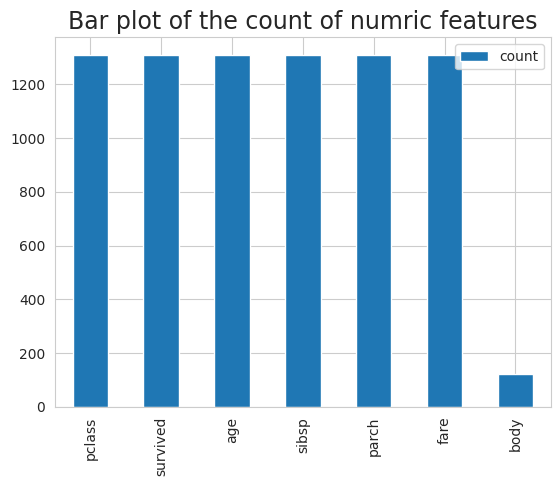

In [ ]:
df['age'] = df[['age','pclass']].apply(impute_age,axis=1)
d=df.describe()

dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numric features",fontsize=17)

##Drop the 'Cabin'Feature and any other null value

In [ ]:
df.drop('cabin',axis=1,inplace=True)
df.dropna(inplace=True)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest


**Drop other unncessary features**

like'Cabin','Passengerld','Name','Ticket'

In [ ]:
df.drop(['name','ticket'],axis=1,
        inplace=True)
df.dropna(inplace=True)
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest


**Convert categorial features like 'Sex'**

and 'Embarked to dummy varibles

**Use pandas 'get_dummies()'function**

In [ ]:
sex = pd.get_dummies(df['sex'],drop_first=True)
embark = pd.get_dummies(df['embarked'],drop_first=True)

**Now drop the 'Sex' and 'Embarked' columns and concatenate the new dummy variables**

In [ ]:
df.drop(['sex','embarked'],axis=1,inplace=True)
df=pd.concat([df,sex,embark],axis=1)
df.head()

,pclass,survived,age,sibsp,parch,fare,boat,body,home.dest
